## Period vs. Angle Plot of a Simple Pendulum

Pendulum: a 6cm-lock hanging on a 30cm-string.

Measure the time the lock takes to swing 20 periods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta_initial = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])  # in degrees
time_taken = np.array([24, 23, 24, 24, 25, 25, 28, 27, 25])  # in seconds
period = time_taken / 20.0

Theoretical period (with small angle approximation): $T=2\pi\sqrt{\frac{L}{g}}$

In [4]:
g = 9.81
l0 = 0.30 + 0.5 * 0.06  # position of the center of the lock
period_theo = 2.0 * np.pi * (l0 / g)**0.5
print("The theoretical period is", period_theo, "seconds.")

The theoretical period is 1.1523975720474915 seconds.


Linear regression

In [6]:
m, b = np.polyfit(theta_initial, period, 1)
print(m, b)

0.002083333333333324 1.1458333333333333


Plot the graph

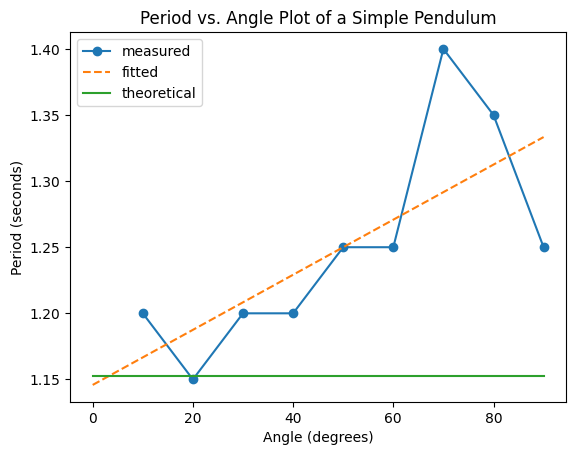

In [15]:
plt.clf()
plt.title("Period vs. Angle Plot of a Simple Pendulum")
plt.xlabel("Angle (degrees)")
plt.ylabel("Period (seconds)")
plt.plot(theta_initial, period, "o-")
plt.plot([0, 90], [b, m*90+b], '--')
plt.plot([0, 90], [period_theo]*2, '-')
plt.legend(["measured", "fitted", "theoretical"])
plt.show()

A Desmos graph with the same data can be found here: https://www.desmos.com/calculator/vu177lhdej